<a href="https://colab.research.google.com/github/ridwanulhoquejr/The-Spark-Foundation-Internship/blob/main/Create_a_Decision_Tree_Classifier_and_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation GRIP-Data Science and Business Analytics Intern 🚀

---

**Name : Ridwanul Hoque** 👶

### **Task 06: Predicting using Decision Tree Algorithm** 🥈

In [95]:
# Load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [9]:
# Load the dataset

df = load_dataset('iris')

In [40]:
df[::-1]

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [27]:
df.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


### Preview of Data
  - There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
  - There are no null values, so we don't have to worry about that.
  - There are 50 observations of each species (setosa, versicolor, virginica).

# EDA

## Relationship between 
    - petal_length & petal_width
    - sepal_length & sepal_width

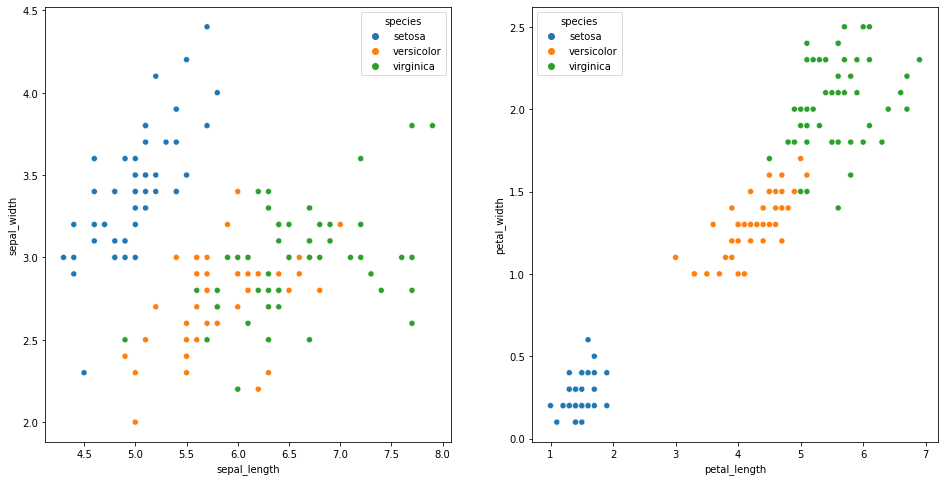

In [101]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(x= df['sepal_length'], y=df['sepal_width'], hue='species', data=df, ax=axes[0])
sns.scatterplot(x= df['petal_length'], y=df['petal_width'], hue='species', data=df, ax=axes[1]);

As we can see in above figure, petal's datapoints are spread away than sepal's datapoints
- Lets plot the `Boxplot` for better understanding

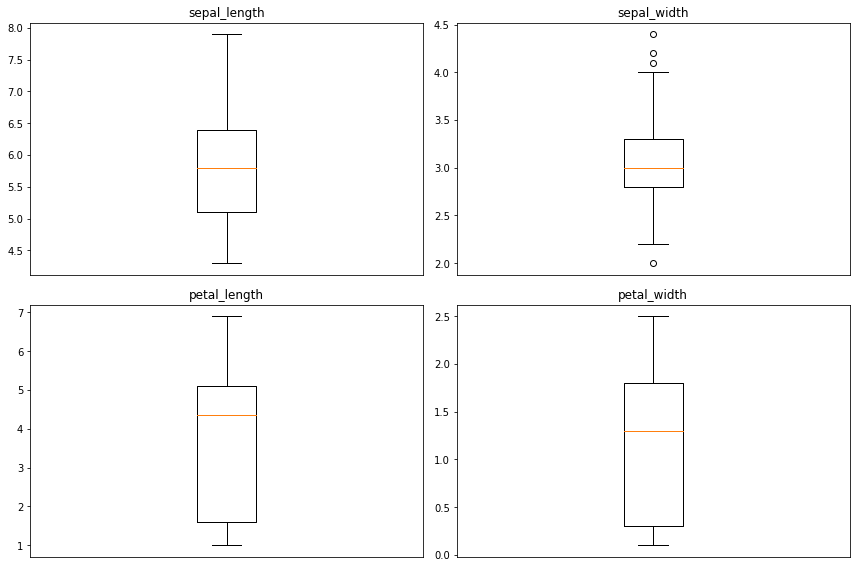

In [84]:

fig, axes = plt.subplots(2, 2, figsize=(12,))

axes[0,0].boxplot(df['sepal_length'])
axes[0,0].xaxis.set_visible(False)
axes[0,0].set_title('sepal_length')

axes[0,1].boxplot(df['sepal_width'])
axes[0,1].xaxis.set_visible(False)
axes[0,1].set_title('sepal_width')

axes[1,0].boxplot(df['petal_length'])
axes[1,0].xaxis.set_visible(False)
axes[1,0].set_title('petal_length')

axes[1,1].boxplot(df['petal_width'])
axes[1,1].xaxis.set_visible(False)
axes[1,1].set_title('petal_width')


fig.tight_layout()
fig.show()

# Model building

In [88]:
x = df.drop('species', axis=1)
y = df.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
# Choose the criterion and max depth of the tree you want to use
CRITERION = 'gini'
MAX_DEPTH = 3

# Set up the DT classifier
dt_clf = DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, random_state=43)

# Train the DT classifier
_=dt_clf.fit(x_train, y_train)

# Evaluate the DT on the test set
y_pred = dt_clf.predict(x_test)
print(f'Model accuracy score with criterion {CRITERION} index: {accuracy_score(y_test, y_pred):.4f}')

Model accuracy score with criterion gini index: 1.0000


# Visualizing Decision Tree

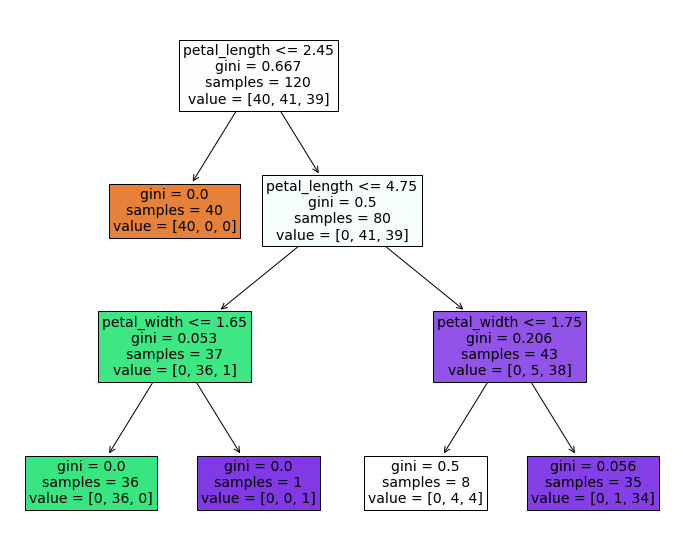

In [100]:
# visualize the DT

plt.figure(figsize=(12,10))
_=tree.plot_tree(dt_clf.fit(x_train, y_train), feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], fontsize=14, filled=True) 